In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Essa classe define os métodos e atributos para trabalhar

In [2]:
class AC:
    def __init__(self, amp, omg, fase):
        self.amplitude = amp
        self.omega = omg
        self.fase = fase
    
    def rms(self):
        return self.amplitude / np.sqrt(2)
    
    def freq(self):
        return self.omega / (2*pi)
    
    def fasorial(self):
        return f'{self.rms():.2f}<{self.fase}°'
    
    def graf_func_onda(self):
        periodo = 1 / self.freq()
        t = np.linspace(0, 3*periodo, 100)
        f = self.amplitude * np.cos(self.omega * t + self.fase)
        
        fig, ax = plt.subplots()
        ax.grid()
        ax.axhline(y=0, color='k', alpha=.5)

        ax.plot(t, f)
        ax.plot(t, np.repeat(self.rms(), 100))
        plt.show()
    
    def graf_fasor(self):
        x = self.rms() * np.cos(np.radians(self.fase))
        y = self.rms() * np.sin(np.radians(self.fase))

        fig, ax = plt.subplots()
        plt.grid()
        
        xlim = np.abs(x*1.25) if abs(x) > 0 else 1
        ylim = np.abs(y*1.25) if abs(y) > 0 else 1
        plt.xlim(-xlim, xlim)
        plt.ylim(-ylim, ylim)
        
        plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1., color='red')
        
        ax.axhline(y=0, color='gray', alpha=.35)
        ax.axvline(x=0, color='gray', alpha=.35)
        plt.show()
    
    def calc_imped(self, valor, tipo):
        if tipo == 'L':
            return complex(0, self.omega * valor)
        elif tipo == 'C':
            return complex(0, - 1/(self.omega * valor))
        elif tipo == 'R':
            return valor
        else:
            raise Exception('Os tipos admitidos são: R, L e C')
    
    def __str__(self):
        return f'{self.amplitude}cos({self.omega}t+{self.fase}°)V'

### Sabe-se que o circuito em corrente alternada, apresentado na figura a seguir, é alimentado com frequência de 60Hz.

<img src="Sem1-FEG002_EA_Q0.png">

### Função de onda

O objeto *ac* recebe os parámetros: amplitude, ômega e fase. Você pode alterar esses valores e usar a opção "Restart kernel and Run All Cells" do menu "Run" para observar as mudanças.

In [3]:
ac = AC(141.42, 377, 0)

141.42cos(377t+0°)V


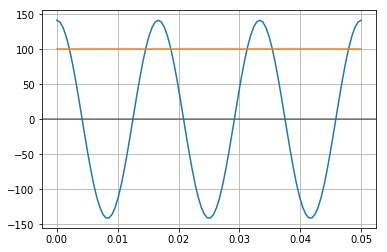

In [4]:
print(f'{ac}')
ac.graf_func_onda()

### Valor eficaz e frequência

In [5]:
rms = ac.rms()
freq = ac.freq()

print(f'valor eficaz: {rms:.2f}Vrms')
print(f'frequência:   {freq:.2f}Hz')

valor eficaz: 100.00Vrms
frequência:   60.00Hz


### Representação fasorial

In [6]:
fasor = ac.fasorial()
print(fasor)

100.00<0°


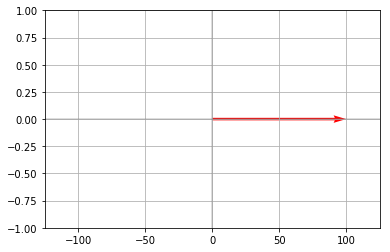

In [7]:
ac.graf_fasor()

### Cálculo das impedâncias

Aqui, você também pode mudar os valores de resistência, indutancia e capacitancia, para obter os cálculos das impedâncias segundo a frequência do circuito AC.

In [8]:
resistencia = 5           # 5 ohms
indutancia = 106.7e-3     # 106.7 mH
capacitancia = 88.4e-6    # 88.4 uF

i_resistor = ac.calc_imped(resistencia, 'R')
i_indutor = ac.calc_imped(indutancia, 'L')
i_capacitor = ac.calc_imped(capacitancia, 'C')

print(f"resistor:  {i_resistor} \u03A9")
print(f"indutor:   {i_indutor:.2f} \u03A9")
print(f"capacitor: {i_capacitor:.2f} \u03A9")

resistor:  5 Ω
indutor:   0.00+40.23j Ω
capacitor: 0.00-30.01j Ω
